# **Introductory Python for Climate Model Analysis Tutorials**

## **Tutorial 1: Introduction to netCDFs**

Hello and welcome! The goal of this tutorial series is to introduce you to Python for climate model data analysis and visualization. In this first tutorial, we will get aquainted with the most common file format for climate model output, the **netCDF file** and an incredibly useful Python package built for handling them, **Xarray**.

## *What is netCDF?*

The netCDF file format (ending in .nc) is commonly used to store multidemensional (N-dimensional, ND) data in a series of structured arrays. The variables output by a climate model, such as temperature and pressure, need to be stored in an ND format since they typically vary across latitude, longitude, altitude, and time. The graphic below depicts this file structure.

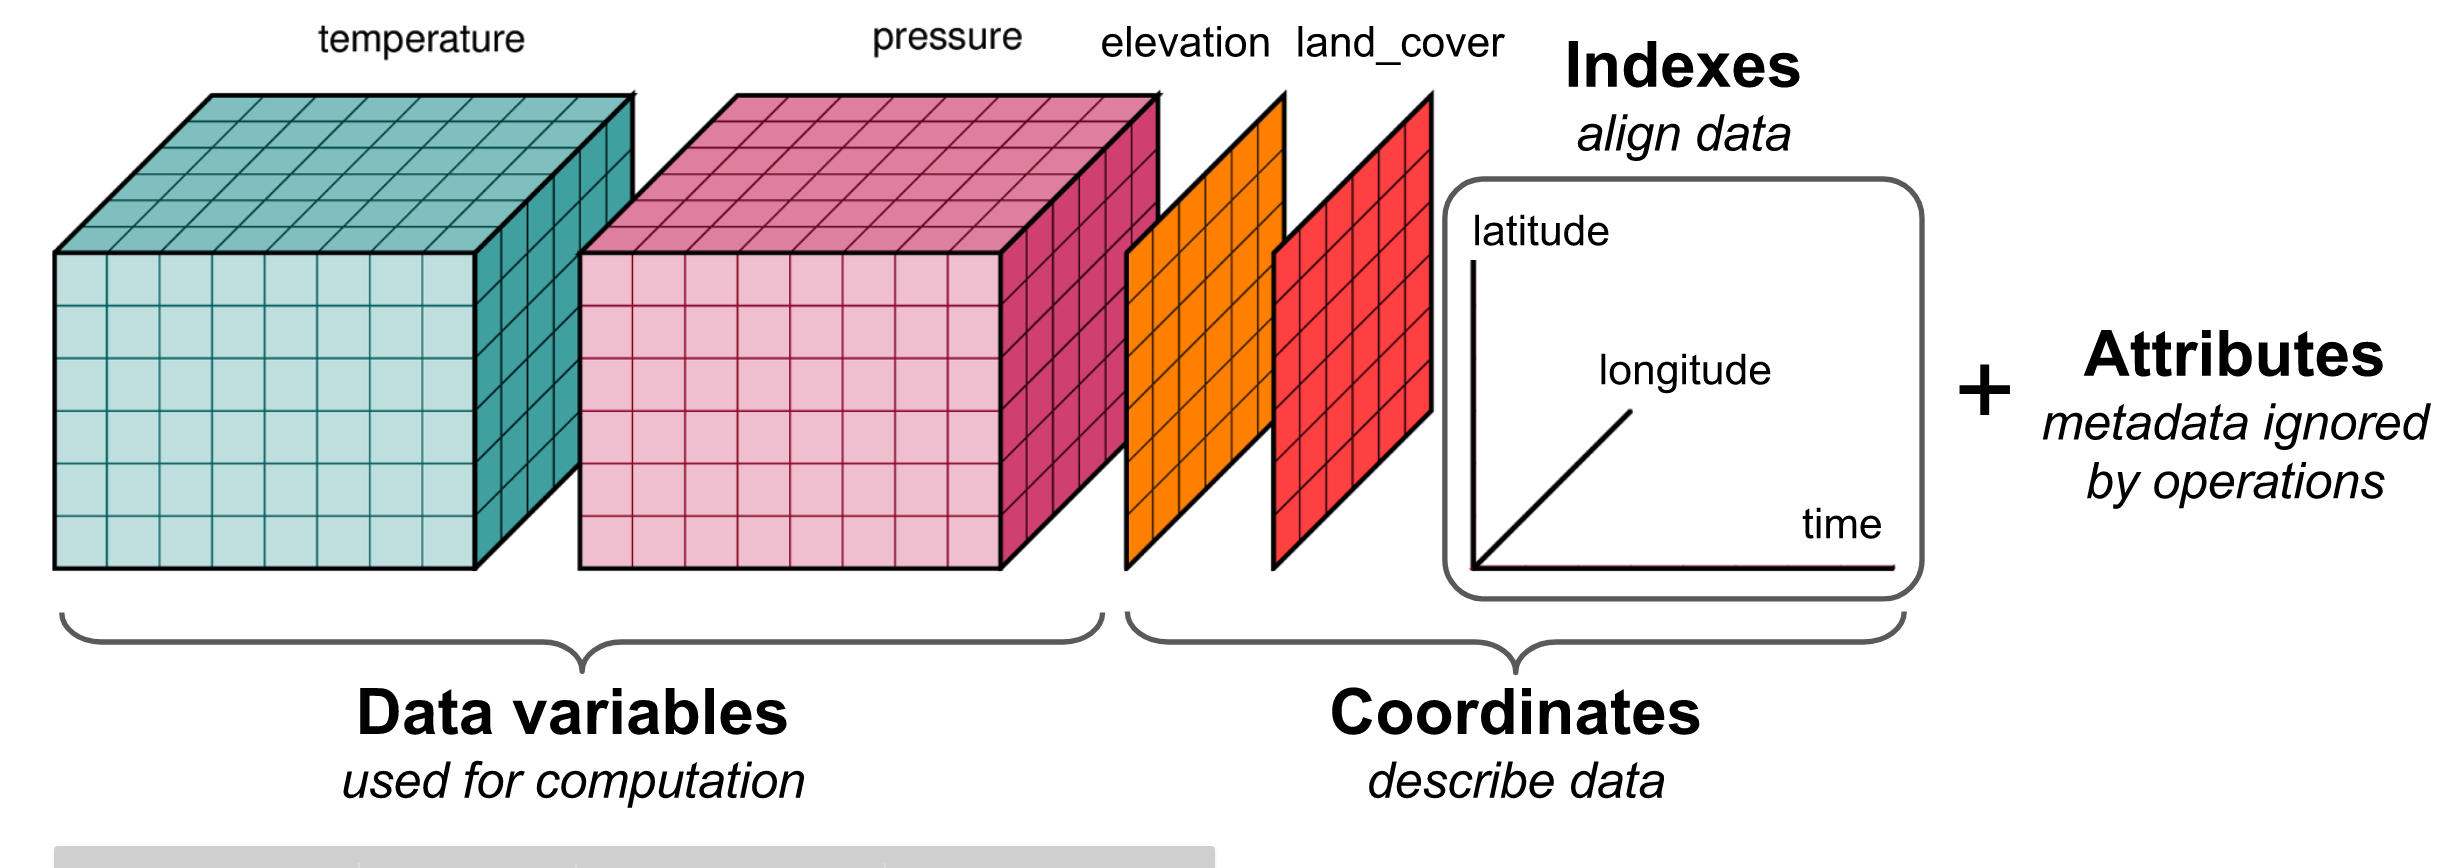

In this tutorial, we will be working with output from the **Community Earth System Model version 2** (CESM2, see documentation [here]('https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019ms001916')). However, these tools will apply to most climate model and chemistry transport model output, as well as other ND data like satellite retreivals.

## *What is Xarray?*

Xarray is a Python package that allows users to interface with and operate on ND data, such as netCDF files. Let's import Xarray and open an example file.

In [1]:
import xarray as xr

The following file contains post-processed output of aerosol optical depth (AOD) from the **CESM2-WACCM6** chemistry-climate model. Poke around the Xarray ``Dataset`` to explore its structure.

In [2]:
ds=xr.open_dataset("/net/fs09/d0/shelkins/Projects/Intro_Tutorials/data/AODVIS_annual_HIST_wa6_ic1.001_1970_2013.nc", engine = "netcdf4")
ds

<xarray.Dataset>
Dimensions:  (year: 44, lat: 192, lon: 288)
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    AODVIS   (year, lat, lon) float64 ...
Attributes:
    data_title:     AODVIS_CESM2_WACCM6_HIST_1970_2013
    data_summary:   annual aerosol optical depth 550 nm for HIST ensemble
    data_host:      Svante
    data_contact:   Stephanie Elkins, shelkins@mit.edu
    model_doi_url:  https://doi.org/10.5065/D67H1H0V

You probably noticed the following 5 components in the dropdowns. Let's walk through these.
- ``dimensions``
- ``coordinates``
- ``data variables`` 
- ``indexes`` 
- ``attributes``

The ``dimensions`` of a ``Dataset`` are fairly straightforward. Typical ``dimensions`` include latitude, longitude, altitude and time. To display them:

In [3]:
ds.dims

Frozen({'year': 44, 'lat': 192, 'lon': 288})

Our ``Dataset`` has 3 ``dimensions``: 'year', 'lat', 'lon''. We do not have a vertical ``dimension`` because AOD is a single value for the entire atmospheric column.

Let's look at the 'year' dimension.

In [4]:
ds.year

<xarray.DataArray 'year' (year: 44)>
array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
Attributes:
    long_name:  year

In [ ]:
#Try looking through the other dimensions here.


The difference between ``dimensions`` and ``coordinates`` can be a bit confusing. For most relevant cases, ``coordinates`` can loosely be thought of as the ticks along a given ``dimension``. A bolded ``coordinate`` is a ``dimension-coordinate``, which are ``coordinates`` that can be used for label-based indexing and alignment.

In [5]:
ds.coords

Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

``Indexes`` also indicate which ``coordinates`` can be indexed over.

In [6]:
ds.indexes

Indexes:
    year     Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype='int64', name='year')
    lat      Index([             -90.0, -89.05759162303664,  -88.1151832460733,
       -87.17277486910994,  -86.2303664921466, -85.28795811518324,
        -84.3455497382199, -83.40314136125654, -82.46073298429319,
       -81.51832460732984,
       ...
        81.51832460732984,   82.4607329842932,  83.40314136125653,
        84.34554973821989,  85.28795811518324,   86.2303664921466,
        87.17277486910996,  88.11518324607329,  89.05759162303664,
                     90.0],
      dtype='float64', name='lat', length=192)
    lon      Index([   0.0,   1.25,    2.5,   3.75,    5.0,   6.25,    7.5,   8.75,   10.0,
        11.25,
       ...
     

``Attributes`` provide the metadata for the ``Dataset``, such as the history of the file and/or citation information. ``Attributes`` are a dictionary of strings and are ignored by any operations performed on the ``Dataset``.

In [7]:
ds.attrs

{'data_title': 'AODVIS_CESM2_WACCM6_HIST_1970_2013',
 'data_summary': 'annual aerosol optical depth 550 nm for HIST ensemble',
 'data_host': 'Svante',
 'data_contact': 'Stephanie Elkins, shelkins@mit.edu',
 'model_doi_url': 'https://doi.org/10.5065/D67H1H0V'}

One key distinction is that an Xarray ``Dataset`` contains multiple variables, while an Xarray ``DataArray`` contains only a single variable. We can select variables from a ``Dataset`` using the following syntax:

In [8]:
#select AODVIS DataArray and name it AOD
AOD=ds.AODVIS
AOD

<xarray.DataArray 'AODVIS' (year: 44, lat: 192, lon: 288)>
[2433024 values with dtype=float64]
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

## *Indexing and selecting*

During analysis, you will likely want to select specific regions or time periods from a ``DataArray`` using indexing. There are two main methods for indexing a ``DataArray``: **1.** indexing by name using ``sel`` and ``isel`` or **2.** indexing by position.

Let's say we want to select the first 5 years of ``AOD``. We can index by name using the "year" ``dimension`` and the ``slice`` operator.

In [9]:
AOD.isel(year=slice(None,5)) #using isel
#or
AOD.sel(year=slice(1970,1974)) #using sel

<xarray.DataArray 'AODVIS' (year: 5, lat: 192, lon: 288)>
[276480 values with dtype=float64]
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

Alternatively, we can index by position:

In [10]:
AOD[0:5,:,:]

<xarray.DataArray 'AODVIS' (year: 5, lat: 192, lon: 288)>
[276480 values with dtype=float64]
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

Let's go through some other examples:

In [11]:
#select the last decade, latitudes 20°-90° N:
AOD.sel(year=slice(2004,2013),lat=slice(20,90))

<xarray.DataArray 'AODVIS' (year: 10, lat: 75, lon: 288)>
[216000 values with dtype=float64]
Coordinates:
  * year     (year) int64 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
  * lat      (lat) float64 20.26 21.2 22.15 23.09 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

In [12]:
#select the first 20 years using isel and the tropics using sel:
AOD.isel(year=slice(None,20)).sel(lat=slice(-20,20))

<xarray.DataArray 'AODVIS' (year: 20, lat: 42, lon: 288)>
[241920 values with dtype=float64]
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 1985 1986 1987 1988 1989
  * lat      (lat) float64 -19.32 -18.38 -17.43 -16.49 ... 17.43 18.38 19.32
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

In [13]:
#select the grid cell closest to MIT using the 'nearest' method
AOD.sel(lat= 42.3601, lon = 288.9058, method = 'nearest')

<xarray.DataArray 'AODVIS' (year: 44)>
[44 values with dtype=float64]
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
    lat      float64 41.94
    lon      float64 288.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

In [14]:
#select a box around the US
AOD.sel(lat=slice(25,50), lon = slice(235,293))

<xarray.DataArray 'AODVIS' (year: 44, lat: 26, lon: 47)>
[53768 values with dtype=float64]
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
  * lat      (lat) float64 25.92 26.86 27.8 28.74 ... 46.65 47.59 48.53 49.48
  * lon      (lon) float64 235.0 236.2 237.5 238.8 ... 288.8 290.0 291.2 292.5
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

Another tool for selecting is the ``.where()`` method. A boolean is passed to ``.where()`` and the ``DataArray`` is returned with `nan` values where this condition is not met, but the original ``dimensions`` of the ``DataArray`` are maintained. This makes it useful for masking. Let's use ``.where()`` to select the Southern Hemisphere:

In [15]:
#select the southern hemisphere
AOD.where(AOD.lat<0)

<xarray.DataArray 'AODVIS' (year: 44, lat: 192, lon: 288)>
array([[[0.00432728, 0.00432717, 0.00432735, ..., 0.0043271 ,
         0.00432726, 0.00432726],
        [0.00437295, 0.00437362, 0.0043723 , ..., 0.00437246,
         0.0043739 , 0.00437403],
        [0.00438828, 0.00438807, 0.004388  , ..., 0.00438884,
         0.0043872 , 0.00438597],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.00337179, 0.00337181, 0.00337173, ..., 0.00337179,
         0.00337157, 0.00337185],
        [0.0034052 , 0.00340405, 0.00340493, ..., 0.00340824,
         0.0034068 , 0.00340544],
        [0.00339036, 0.00338822, 0.00338614, ..., 0.00339844,
         0.00339543, 0.00339274],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.00343913, 0.00344109, 0.0034399 , ..., 0.00344048,
         0.0034396 , 0.00344011],
        [0.00348777, 0.0034894 , 0.00349128, ..., 0.00349198,
         0.00348974, 0.00348888],
        [0.0034769 , 0.00347672, 0.00348013, ..., 0.00347928,
         0.00348101, 0.00347735],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

``.where()`` can also be used to apply external masks to a ``DataArray``. Let's read in a CONUS mask file (values within CONUS are 0 and those outside are ``nan``) and apply it to ``AOD`` using ``.where()``.

In [16]:
#read in mask
CONUS_mask=xr.open_dataarray('CONUS_mask.nc')

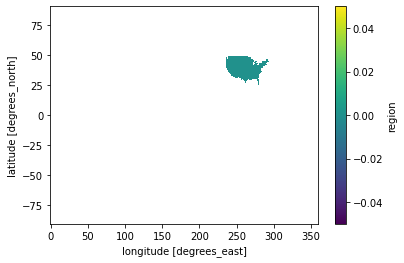

In [17]:
#plot the mask, CONUS values=0, elsewhere=NAN
CONUS_mask.plot()

In [18]:
#apply mask to AOD (all AOD values outside CONUS are set to nan), name it #AOD_US
AOD_US=AOD.where(CONUS_mask==0)
AOD_US

<xarray.DataArray 'AODVIS' (year: 44, lat: 192, lon: 288)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    long_name:  Aerosol optical depth 550 nm, day only
    time_avg:   annual

## *Operations*

Let's go through some operations you can perform on a ``DataArray``.

To take an average across one or more ``dimensions``, one can use the ``.mean()`` method. If a ``dimension`` is not supplied, ``.mean()`` will automatically be applied to every ``dimension`` of the ``DataArray``. For example:

In [19]:
#take mean across all dimensions
AOD.mean()

<xarray.DataArray 'AODVIS' ()>
array(0.11397123)

Most likely, you will be using ``.mean()`` across a specific ``dimension``. Let's say we wanted to take a zonal (latitudinal) mean:

In [20]:
#take zonal mean
AOD.mean(dim="lat")

<xarray.DataArray 'AODVIS' (year: 44, lon: 288)>
array([[0.14235386, 0.1436652 , 0.14691157, ..., 0.13624642, 0.1371778 ,
        0.13916463],
       [0.14478733, 0.14510225, 0.14783866, ..., 0.13960416, 0.14004278,
        0.14196485],
       [0.13977177, 0.14029266, 0.14297958, ..., 0.13453087, 0.13529882,
        0.13713427],
       ...,
       [0.1388702 , 0.13890471, 0.140915  , ..., 0.13602905, 0.13605397,
        0.13683193],
       [0.14533929, 0.14668283, 0.15017597, ..., 0.13909723, 0.14037738,
        0.1424375 ],
       [0.14122209, 0.14172369, 0.14371554, ..., 0.13649777, 0.13712556,
        0.13867725]])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

To apply ``.mean()`` over multiple ``dimensions``, list the ``dimensions`` in parentheses:

In [21]:
#take zonal mean & ensemble mean
AOD.mean(dim=("lat","lon"))

<xarray.DataArray 'AODVIS' (year: 44)>
array([0.1021582 , 0.10123482, 0.10159808, 0.10441772, 0.10251378,
       0.13546912, 0.11685133, 0.10543656, 0.10309385, 0.10418759,
       0.10557691, 0.11045908, 0.144755  , 0.14691018, 0.12077718,
       0.10835608, 0.1114178 , 0.10933686, 0.10910422, 0.10604424,
       0.10592729, 0.15442065, 0.18244439, 0.13204297, 0.11587451,
       0.10886755, 0.10580903, 0.10718866, 0.11071227, 0.10463507,
       0.10418643, 0.10626639, 0.10708383, 0.10974185, 0.10707354,
       0.10930262, 0.11054828, 0.11050602, 0.11413242, 0.11601778,
       0.11057481, 0.11078807, 0.11212836, 0.10876283])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013

You can apply operations and selections in the same line of code. For example, if you want to take a regional mean over the US:

In [22]:
#calculate a regional mean over the US
AOD.sel(lat=slice(25,50), lon = slice(235,293)).mean(dim=("lat","lon"))

<xarray.DataArray 'AODVIS' (year: 44)>
array([0.1005444 , 0.09529418, 0.0893    , 0.09509664, 0.09287637,
       0.14153666, 0.10648752, 0.09460858, 0.09233402, 0.08980212,
       0.09406263, 0.09572498, 0.16108954, 0.15027374, 0.10350585,
       0.09111023, 0.09673518, 0.08711387, 0.08344792, 0.08228023,
       0.08067124, 0.17836725, 0.21450394, 0.11118719, 0.087949  ,
       0.07829182, 0.07612875, 0.07510315, 0.07791968, 0.07247964,
       0.07297614, 0.07224786, 0.07321029, 0.07300518, 0.07016078,
       0.07452504, 0.07381077, 0.07353698, 0.076518  , 0.07549951,
       0.06545364, 0.07081302, 0.06327158, 0.06326769])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013

## *Working with mulitple files*

Earlier, we opened our post-processed CESM2 output using ``xr.open_dataset()``, which reads in and opens a single file as a ``Dataset``. However, raw model output is often saved and stored in annual, monthly, or daily files. Therefore, it is likely that you will need to read in multiple files at once for processing. 

To do this, you can instead use ``xr.open_mfdataset()``, which automatically aligns and concatinates individual netCDF files along their common dimensions.

Here, we will use a package called ``glob`` that helps us collect the filepaths of the desired files:

In [23]:
import glob as glob

As an example, we will read in the monthly CESM2 raw output files for the years 2000 and 2001 (i.e., 24 monthly files). 

First, let's define the parent directory containing the files we want to open and the base string of the *monthly* file names within that directory:

In [24]:
parentdir='/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/' #parent directory of files
filename_base= 'wa6_ic1.001.cam.h0.'   #base filename for the monthly files 

Then, we need to create a list of the individual file paths that we want to open. Let's loop through each year, collect the filepaths for that year with ``glob``, and add them to an empty list called ``path_list``. **Note:** The asterisk within a string means "match anything", meaning glob will find all files that match the path outside of the asterisks *and* the string between the asterisks (in this case, the year). 

In [25]:
import numpy as np

path_list=[]    #empty list
years= np.arange(2000,2002)
for year in years:
    annual_paths= sorted(glob.glob(parentdir + filename_base + '*' + str(year) + '*.nc')) #grab annual filepaths with glob
    path_list.extend(annual_paths)  #append them to the list

path_list = sorted(path_list)  #sort the paths by date

View the filepaths for 2000 and 2001:

In [26]:
path_list

['/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-01.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-02.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-03.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-04.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-05.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-06.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-07.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-08.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-09.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2000-10.nc',
 '/net/fs09/d0/CESM2_WACCM6/historical/wa6_ic1.001/atm/hist/wa6_ic1.001.cam.h0.2

Now, use ``xr.open_mfdataset()`` to open the files all at once. This may take a moment because, as you will see, there are over 200 variables being loaded for each file!

Poke around in the ``Dataset``. Notice that the monthly files have been concatenated by the time ``dimension``. Also, the raw model output has several additional ``dimensions`` compared to the ``Dataset`` we opened earlier.

In [27]:
ds= xr.open_mfdataset(path_list, engine= 'netcdf4')
ds

<xarray.Dataset>
Dimensions:                  (lat: 192, lon: 288, time: 24, zlon: 1, nbnd: 2,
                              lev: 70, ilev: 71)
Coordinates:
  * lat                      (lat) float64 -90.0 -89.06 -88.12 ... 89.06 90.0
  * lon                      (lon) float64 0.0 1.25 2.5 ... 356.2 357.5 358.8
  * zlon                     (zlon) float64 0.0
  * lev                      (lev) float64 5.96e-06 9.827e-06 ... 976.3 992.6
  * ilev                     (ilev) float64 4.5e-06 7.42e-06 ... 985.1 1e+03
  * time                     (time) object 2000-02-01 00:00:00 ... 2002-01-01...
Dimensions without coordinates: nbnd
Data variables: (12/236)
    gw                       (time, lat) float64 dask.array<chunksize=(1, 192), meta=np.ndarray>
    zlon_bnds                (time, zlon, nbnd) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    hyam                     (time, lev) float64 dask.array<chunksize=(1, 70), meta=np.ndarray>
    hybm                     (time, lev) float64 dask.array<chunksize=(1, 70), meta=np.ndarray>
    P0                       (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    hyai                     (time, ilev) float64 dask.array<chunksize=(1, 71), meta=np.ndarray>
    ...                       ...
    r_O1D_H2O                (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    so4_a1                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    so4_a2                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    so4_a3                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    wet_deposition_NHx_as_N  (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    wet_deposition_NOy_as_N  (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              wa6_ic1.001
    logname:           gus
    host:              cheyenne5
    initial_file:      b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001.cam.i....
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

Looking at the time dimension, you may have noticed that the dates appear to be shifted forward by a month. This is because the `Datetime` 2000-02-01 actaully corresponds to the average for the month of January.

In [28]:
ds.time

<xarray.DataArray 'time' (time: 24)>
array([cftime.DatetimeNoLeap(2000, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 4, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 5, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 10, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2000, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 4, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 5, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 10, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2001, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2002, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2000-02-01 00:00:00 ... 2002-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

Let's correct this by defining a function to shift each `DatetimeObject` by a month.

In [29]:
import cftime

def subtract_one_month(date):
    new_month = date.month - 1
    new_year = date.year

    # If the new month is less than 1, adjust the year and month
    if new_month < 1:
        new_month = 12
        new_year -= 1

    return cftime.DatetimeNoLeap(new_year, new_month, date.day, date.hour, date.minute, date.second, date.microsecond, has_year_zero=True)

Now, apply this function to the time `dimension`:

In [30]:
shifted_time = [subtract_one_month(t) for t in ds.time.values]

And replace the original time `dimension` with the shifted times using the ``.assign_coords()`` method:

In [31]:
ds=ds.assign_coords(time=shifted_time)
ds

<xarray.Dataset>
Dimensions:                  (lat: 192, lon: 288, time: 24, zlon: 1, nbnd: 2,
                              lev: 70, ilev: 71)
Coordinates:
  * lat                      (lat) float64 -90.0 -89.06 -88.12 ... 89.06 90.0
  * lon                      (lon) float64 0.0 1.25 2.5 ... 356.2 357.5 358.8
  * zlon                     (zlon) float64 0.0
  * lev                      (lev) float64 5.96e-06 9.827e-06 ... 976.3 992.6
  * ilev                     (ilev) float64 4.5e-06 7.42e-06 ... 985.1 1e+03
  * time                     (time) object 2000-01-01 00:00:00 ... 2001-12-01...
Dimensions without coordinates: nbnd
Data variables: (12/236)
    gw                       (time, lat) float64 dask.array<chunksize=(1, 192), meta=np.ndarray>
    zlon_bnds                (time, zlon, nbnd) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    hyam                     (time, lev) float64 dask.array<chunksize=(1, 70), meta=np.ndarray>
    hybm                     (time, lev) float64 dask.array<chunksize=(1, 70), meta=np.ndarray>
    P0                       (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    hyai                     (time, ilev) float64 dask.array<chunksize=(1, 71), meta=np.ndarray>
    ...                       ...
    r_O1D_H2O                (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    so4_a1                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    so4_a2                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    so4_a3                   (time, lev, lat, lon) float32 dask.array<chunksize=(1, 70, 192, 288), meta=np.ndarray>
    wet_deposition_NHx_as_N  (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
    wet_deposition_NOy_as_N  (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              wa6_ic1.001
    logname:           gus
    host:              cheyenne5
    initial_file:      b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001.cam.i....
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

Let's select the O3 variable.

In [32]:
#select and name it O3
O3= ds.O3
O3

<xarray.DataArray 'O3' (time: 24, lev: 70, lat: 192, lon: 288)>
dask.array<concatenate, shape=(24, 70, 192, 288), dtype=float32, chunksize=(1, 70, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
  * time     (time) object 2000-01-01 00:00:00 ... 2001-12-01 00:00:00
Attributes:
    mdims:         1
    units:         mol/mol
    mixing_ratio:  
    long_name:     O3 concentration
    cell_methods:  time: mean

The ``O3`` ``DataArray`` has 'lev' ``dimension``. This corresponds to the vertical resolution of the atmospheric component of the model, WACCM6, which has 70 levels.

In [33]:
#see lev dimension
O3.lev

<xarray.DataArray 'lev' (lev: 70)>
array([5.960300e-06, 9.826900e-06, 1.620185e-05, 2.671225e-05, 4.404100e-05,
       7.261275e-05, 1.197190e-04, 1.973800e-04, 3.254225e-04, 5.365325e-04,
       8.846025e-04, 1.458457e-03, 2.404575e-03, 3.978250e-03, 6.556826e-03,
       1.081383e-02, 1.789800e-02, 2.955775e-02, 4.873075e-02, 7.991075e-02,
       1.282732e-01, 1.981200e-01, 2.920250e-01, 4.101675e-01, 5.534700e-01,
       7.304800e-01, 9.559475e-01, 1.244795e+00, 1.612850e+00, 2.079325e+00,
       2.667425e+00, 3.404875e+00, 4.324575e+00, 5.465400e+00, 6.872850e+00,
       8.599725e+00, 1.070705e+01, 1.326475e+01, 1.635175e+01, 2.005675e+01,
       2.447900e+01, 2.972800e+01, 3.592325e+01, 4.319375e+01, 5.167750e+01,
       6.152050e+01, 7.375096e+01, 8.782123e+01, 1.033171e+02, 1.215472e+02,
       1.429940e+02, 1.682251e+02, 1.979081e+02, 2.328286e+02, 2.739108e+02,
       3.222419e+02, 3.791009e+02, 4.459926e+02, 5.246872e+02, 6.097787e+02,
       6.913894e+02, 7.634045e+02, 8.208584e+02, 8.595348e+02, 8.870202e+02,
       9.126445e+02, 9.361984e+02, 9.574855e+02, 9.763254e+02, 9.925561e+02])
Coordinates:
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS

Finally, lets process the monthly O3 output into annual averages. We can do this using the ``.groupby()`` method and followed by ``.mean()`` across the selected groups:

In [34]:
O3_annual= O3.groupby("time.year").mean()
O3_annual

<xarray.DataArray 'O3' (year: 2, lev: 70, lat: 192, lon: 288)>
dask.array<stack, shape=(2, 70, 192, 288), dtype=float32, chunksize=(1, 70, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 957.5 976.3 992.6
  * year     (year) int64 2000 2001
Attributes:
    mdims:         1
    units:         mol/mol
    mixing_ratio:  
    long_name:     O3 concentration
    cell_methods:  time: mean

## *Plotting Examples*

Next, we will work through three plotting examples to demonstrate various operations you will likely use to visualize your data. 
>1. Time series of area-weighted global mean AOD
>2. Global maps of AOD climatology
>3. Zonal mean O3 concentration for a single year

Let's import a few more packages that we will need:

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.cm as cm
from cartopy.util import add_cyclic_point
from matplotlib.colors import LogNorm

#### **Example 1:** Time series of area-weighted global mean AOD 
First, we will calculate the area-weighted global mean AOD and plot a time series from 1970-2014. When calculating global mean, we must remember to area weight since different grid cells account for more area of the globe.

Calculate area weights as a function of latitude: 

In [36]:
weights= np.cos(np.deg2rad(ds.lat))

``Xarray`` has a built in weighting method ``.weighted()``. Just pass in the ``weights``.

In [37]:
AOD_weighted= AOD.weighted(weights) #name the weighted area AOD_weighted
AOD_weighted

DataArrayWeighted with weights along dimensions: lat

Now, we can take the global mean from ``AOD_weighted``.

In [38]:
AOD_gm= AOD_weighted.mean(dim=("lat","lon"))
AOD_gm

<xarray.DataArray 'AODVIS' (year: 44)>
array([0.13299101, 0.13228013, 0.13327132, 0.1369637 , 0.1343897 ,
       0.16843503, 0.14793806, 0.13603479, 0.13434019, 0.13636731,
       0.13537806, 0.14233733, 0.1782829 , 0.17789859, 0.15169053,
       0.13905264, 0.14353933, 0.14195031, 0.14229985, 0.13814548,
       0.13867826, 0.19014548, 0.20902908, 0.16243724, 0.14839861,
       0.14072109, 0.13819945, 0.14155643, 0.14543216, 0.137883  ,
       0.13718764, 0.14016679, 0.14108128, 0.14396116, 0.14067452,
       0.14434743, 0.14536012, 0.143755  , 0.14775712, 0.1492513 ,
       0.14567904, 0.14456354, 0.14693551, 0.14297982])
Coordinates:
  * year     (year) int64 1970 1971 1972 1973 1974 ... 2009 2010 2011 2012 2013

Great! Now we can plot the time series using ``matplotlib``.

Text(0.5, 1.0, 'Area-weighted global mean AOD')

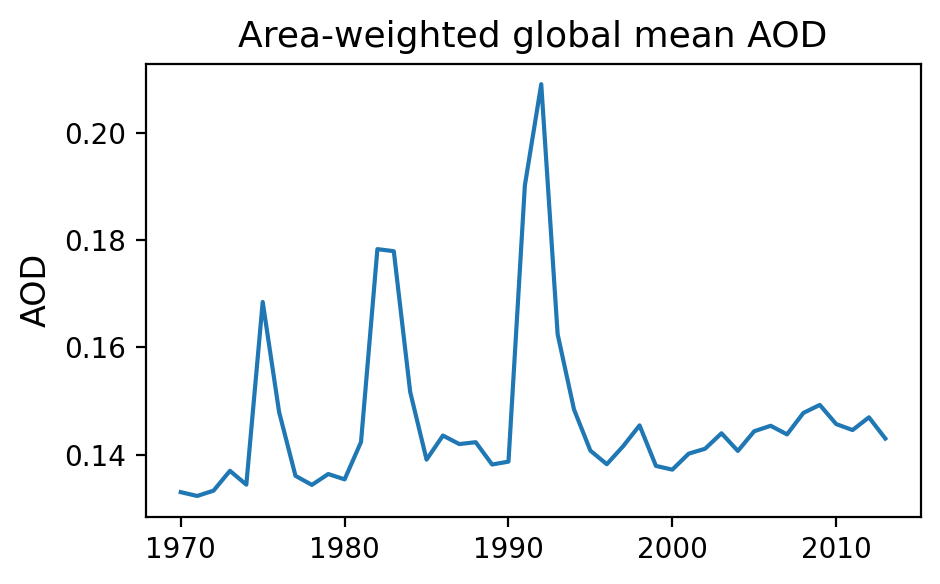

In [40]:
#create a figure axis
plt.figure(figsize=(5, 3),dpi=200,facecolor="white")

#plot(x,y)
plt.plot(AOD_gm.year, AOD_gm)

#add plot features and labels
plt.ylabel('AOD', size = 12)  
plt.title("Area-weighted global mean AOD",fontsize = 13)

#### **Example 2:** Global maps of AOD climatology

In this example, we will plot a 30 year climatology between 1970 to 1999.

In [41]:
#take the mean from years 1970-1999 and name it AOD_clim
AOD_clim=AOD.sel(year=slice(1970,1999)).mean(dim="year")
AOD_clim

<xarray.DataArray 'AODVIS' (lat: 192, lon: 288)>
array([[0.00649723, 0.00649725, 0.00649717, ..., 0.00649719, 0.00649712,
        0.00649728],
       [0.00653522, 0.00653453, 0.00653394, ..., 0.00653644, 0.00653586,
        0.0065353 ],
       [0.00656421, 0.00656302, 0.00656141, ..., 0.00656847, 0.00656697,
        0.00656559],
       ...,
       [0.02541227, 0.0254333 , 0.02546399, ..., 0.02535463, 0.0253839 ,
        0.02539253],
       [0.02544827, 0.02545659, 0.02546171, ..., 0.02542074, 0.02543275,
        0.02543687],
       [0.0254321 , 0.02543324, 0.02543097, ..., 0.02543564, 0.02543428,
        0.02543312]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

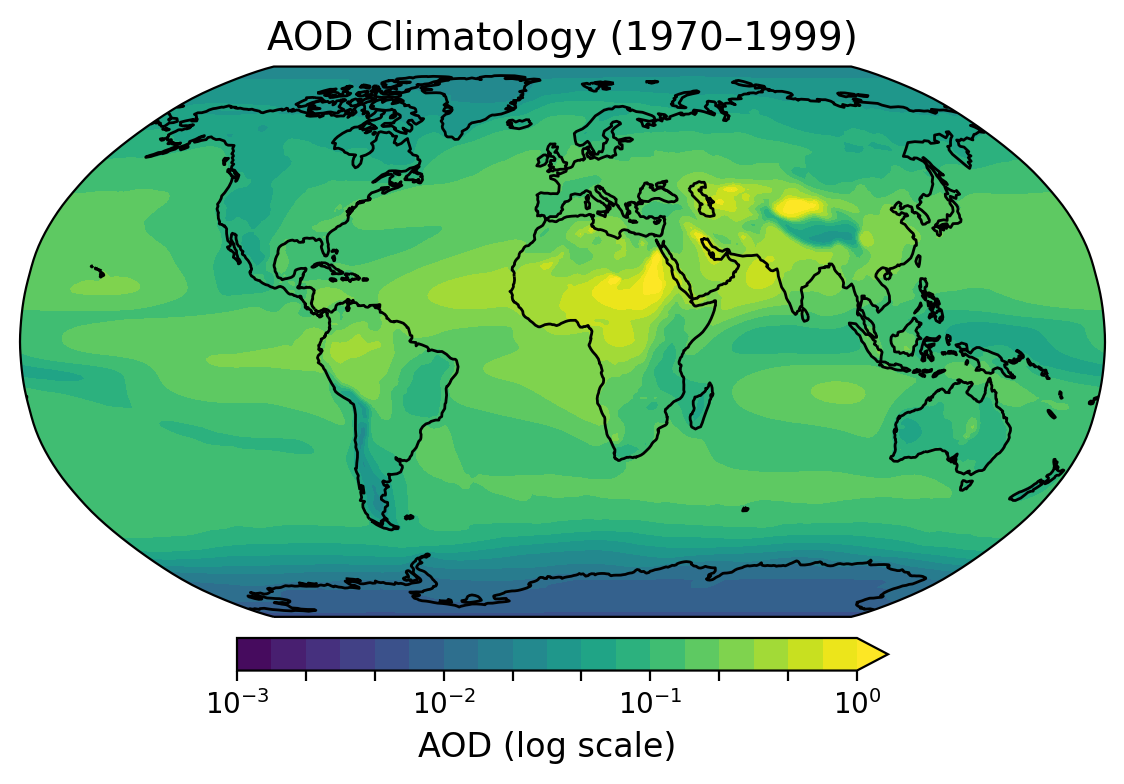

In [42]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection': ccrs.Robinson()}, dpi=200, facecolor="white")

original_lon = AOD_clim.lon
lat = AOD_clim.lat
AOD_clim_, lon = add_cyclic_point(AOD_clim.copy(), coord=original_lon)

clevs = np.logspace(np.log10(.001), np.log10(1), 19)

# Plot with log scale
im = ax.contourf(
    lon, lat, AOD_clim_,
    levels=clevs,
    transform=ccrs.PlateCarree(),
    cmap=cm.viridis,
    norm=LogNorm(vmin=.001, vmax=1),extend='max')

# map features and title
ax.coastlines()
ax.set_title("AOD Climatology (1970–1999)", fontsize=14)

#colorbar labels
cbar = fig.colorbar(im, ax=ax, orientation='horizontal', shrink=0.6, pad=0.02)
cbar.set_label('AOD (log scale)', fontsize=12)

#### **Example 3:** Zonal mean O3 concentration for a single year

## *Excercises*

Now try working on two examples by yourself.

### **Want more resources?**

Check out:

- __[Xarray Documentation](https://docs.xarray.dev/en/stable/)__

- __[Xarray in 45-minutes](https://tutorial.xarray.dev/overview/xarray-in-45-min.html)__

- __[Youtube tutorial](https://www.youtube.com/watch?v=mecN-Ph_-78)__ that walks through Xarray structure and operations (long but thorough)